# Implementation of the SIFT algorithm (Scale-Invariant Feature Transform)

Finds correpondance based on characteristic features of the template, such as edges.

Risks: 

- This algorithm is sensitive to the appearance of the template in the template image. Meaning, changes in color, scale or rotation may result in incorrect findings.


Interesting:

- Even for color images, applying SIFT on grayscale version improves performance 


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

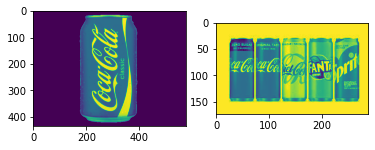

In [8]:
# Load the images
img1 = cv2.imread('c1.jpeg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread("c-temp.png", cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(1,2)
axs[0].imshow(template)
axs[1].imshow(img1)

In [9]:
# SIFT (Scale-Invariant Feature Transform)

# Apply transofrmations to mitigate the SIFT limitations 

def scale(img, scale_percent): #10, 40, 60, 100
    
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

def rotate(img, angle):
    
    height, width = img.shape[:2]
    scale = 1.0
    center = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)

    rotated_img = cv2.warpAffine(img, M, (width, height))


def brightness(img, alpha, beta):
    
    alpha = 1.5  # Contrast control (1.0-3.0)
    beta = 0     # Brightness control (0-100)

    contrasted_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)

    pass

trasnformations_list = {'s1': (scale, [(img, 10), (img, 40)]),
                        's2': 
                       }

#Resize, Rotate, change brightness

  
# resize image

cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)



# Detect SIFT keypoints and descriptors in the images
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Use the BFMatcher to find the best matches between the descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Define a threshold for the ratio test
threshold = 0.75

# Filter the matches using the Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < threshold * n.distance:
        good_matches.append(m)

# Draw the matches on the images
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the results
plt.figure(figsize = (20,10))
plt.imshow(img_matches)



IndentationError: expected an indented block (155020296.py, line 14)

# Limits

Template matching has some limitations that can affect its performance:

1.  **Sensitivity to scale and rotation**: Template matching is often sensitive to changes in scale and rotation between the template and the larger image. If the template and the target image do not have the same scale or orientation, the method may not find a good match.
2.  **Illumination variations**: Changes in lighting conditions can also impact the performance of template matching. Shadows, reflections, and other illumination variations can cause the appearance of the template to change, making it more difficult to find a good match.
3.  **Background clutter**: If the background in the target image is cluttered or has patterns similar to the template, this can interfere with the ability of the method to find the correct match.
4.  **Noise**: Noisy images can also impact the performance of template matching, as the noise can affect the similarity score and cause false matches to be detected.
5.  **Limited to small templates**: Template matching is most effective when the template is small relative to the target image. If the template is too large, it can become difficult to find a good match, as the search space becomes too large.